# Tests Run with 32MB and 4 fragments and distributed parity = True
# Run in WSL on a Intel i5-2500K CPU @ 3.30GHz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Open the files and get the data
fileNames = ["32BlockLength.txt", "64BlockLength.txt", "128BlockLength.txt", "256BlockLength.txt"]
averages = []

# data format: [encrypt, fragment, defragment, decrypt]

for file in fileNames:
    with open(file, "r") as f:
        data = f.read()
        data = data.split("\n")
        data = data[:-1]

        # parse numbers from data
        for i in range(len(data)):
            data[i] = data[i].split(", ")
            data[i] = [int(x) for x in data[i]]

    # calculate averages by column
    averages.append([])
    for i in range(len(data[0])):
        averages[-1].append(sum([x[i] for x in data]) / len(data))


print(averages)

[[402.5, 7985.36, 2157.0, 495.46], [396.82, 4213.44, 1045.9, 479.88], [391.86, 2314.62, 575.36, 492.06], [383.52, 1174.14, 290.02, 481.78]]


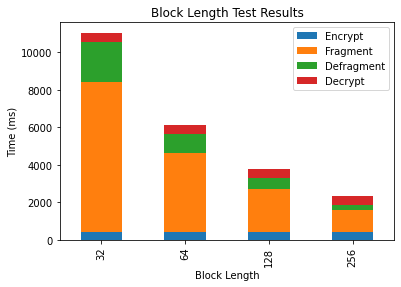

In [4]:
df = pd.DataFrame(averages)
df.columns = ["Encrypt", "Fragment", "Defragment", "Decrypt"]
df.index = ["32", "64", "128", "256"]
# crete a stacked bar chart

df.plot.bar(stacked=True)

plt.xlabel("Block Length")
plt.ylabel("Time (ms)")
plt.title("Block Length Test Results")
plt.show()
